In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Creditcard_data.csv")
X = df.drop("Class", axis = 1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, stratify = y, random_state = 42
)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
df.head(10)
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Sampling Method      Bootstrap  Cluster  Simple Random  Stratified  Systematic
Model                                                                         
Decision Tree           0.8750   0.9828         0.9267      0.9698      0.9784
Logistic Regression     0.9871   0.9871         0.9871      0.9871      0.9871
Naive Bayes             0.9526   0.9871         0.9397      0.9871      0.9871
Random Forest           0.9914   0.9871         0.9871      0.9871      0.9871
SVM                     0.9871   0.9871         0.9871      0.9871      0.9871


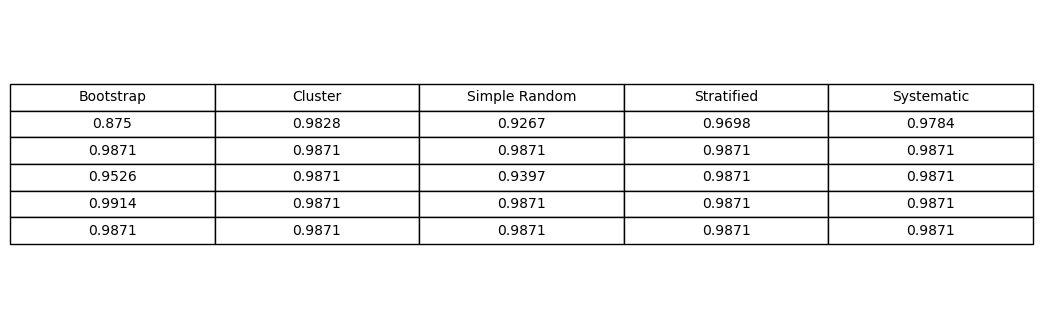

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators = 100),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}
     

# 1. Simple Random Sampling
simple_random = df.sample(frac = 0.5, random_state = 42)

# 2. Systematic Sampling
systematic = df.iloc[::2]

# 3. Stratified Sampling
stratified, _ = train_test_split(
    df, train_size = 0.5, stratify = df["Class"], random_state = 42
)
# 4. Cluster Sampling
df_cluster = df.copy()
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df_cluster.drop("Class", axis = 1))
kmeans = KMeans(n_clusters = 5, random_state = 42)
df_cluster["Cluster"] = kmeans.fit_predict(X_pca)
cluster = df_cluster[df_cluster["Cluster"].isin([0, 1])]
cluster = cluster.drop("Cluster", axis = 1)

# 5. Bootstrap Sampling
bootstrap = df.sample(frac = 1, replace = True, random_state = 42)

sampling_methods = {
    "Simple Random": simple_random,
    "Systematic": systematic,
    "Stratified": stratified,
    "Cluster": cluster,
    "Bootstrap": bootstrap
}
     

# Training Samples On Model
results = []
for s_name, sample in sampling_methods.items():
    if sample["Class"].nunique() < 2:
        continue
    Xs = sample.drop("Class", axis=1)
    ys = sample["Class"]
    X_train, _, y_train, _ = train_test_split(
        Xs, ys, test_size = 0.3, stratify = ys, random_state = 42
    )
    X_train = scaler.fit_transform(X_train)
    for m_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([s_name, m_name, round(acc, 4)])
     

# Table Creation
results_df = pd.DataFrame(
    results,
    columns = ["Sampling Method", "Model", "Accuracy"]
)
final_table = results_df.pivot(
    index = "Model",
    columns = "Sampling Method",
    values = "Accuracy"
)
print(final_table)

# Table Display
fig, ax = plt.subplots(figsize = (11, 4))
ax.axis("off")
table = ax.table(
    cellText = final_table.round(4).values,
    colLabels = final_table.columns,
    cellLoc = "center",
    loc = "center"
)
table.scale(1.2, 1.6)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()